In [1]:
import numpy as np
import pandas as pd
import pickle as pk
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_theme(style="whitegrid")

In [2]:
with open('data/processed_ground_motion_data.pkl', 'rb') as file:
    ground_motion = pk.load(file)

In [3]:
ground_motion

,Record Sequence Number,EQID,Earthquake Name,YEAR,MODY,HRMN,Station Name,Station Sequence Number,Station ID No.,Earthquake Magnitude,...,Instrument Nat. Freq.,Instrument Damping,Instrument Type,Quality_Flag,Spectra Quality Flag,Late S-trigger,Late P-trigger,Idirectivity,Tp,Ry 2
0,1,1,"Helena, Montana-01",1935,1031,1838,Carroll College,197,2022,6.0,...,-999.0000,-999.0000,-999,-999,0,-999,-999,0,-999.0,8.046386
1,2,2,"Helena, Montana-02",1935,1031,1918,Helena Fed Bldg,198,2229,6.0,...,-999.0000,-999.0000,-999,-999,0,-999,-999,0,-999.0,0.155745
2,3,3,Humbolt Bay,1937,207,442,Ferndale City Hall,133,1023,5.8,...,-999.0000,-999.0000,-999,-999,0,-999,-999,0,-999.0,-38.820722
3,4,4,Imperial Valley-01,1938,606,242,El Centro Array #9,75,117,5.0,...,-999.0000,-999.0000,-999,-999,0,-999,-999,0,-999.0,23.958844
4,5,5,Northwest Calif-01,1938,912,610,Ferndale City Hall,133,1023,5.5,...,-999.0000,-999.0000,-999,-999,0,-999,-999,0,-999.0,51.112544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21535,21536,1265,51177103,2006,1223,649,San Andreas Cal.,100433,JSA,3.6,...,223.9758,0.6971,a,-999,0,-999,-999,-999,-999.0,-999.000000
21536,21537,1265,51177103,2006,1223,649,Stanford Telescope,100448,JSFB,3.6,...,223.9758,0.6971,a,-999,0,-999,-999,-999,-999.0,-999.000000
21537,21538,1265,51177103,2006,1223,649,San Pedro Valley,100331,JSP,3.6,...,223.9758,0.6971,a,-999,0,-999,-999,-999,-999.0,-999.000000
21538,21539,1265,51177103,2006,1223,649,Point Molate,100054,CPM,3.6,...,49.9901,0.7071,a,-999,0,-999,-999,-999,-999.0,-999.000000


In [4]:
#  Print all columns
for i, header in enumerate(ground_motion.columns.tolist()):
    print(i, header)

0 Record Sequence Number
1 EQID
2 Earthquake Name
3 YEAR
4 MODY
5 HRMN
6 Station Name
7 Station Sequence Number
8 Station ID  No.
9 Earthquake Magnitude
10 Magnitude Type
11 Magnitude Uncertainty: Kagan Model
12 Magnitude Uncertainty: Statistical
13 Magnitude Sample Size
14 Magnitude Uncertainty: Study Class
15 Mo (dyne.cm)
16 Strike (deg)
17 Dip (deg)
18 Rake Angle (deg)
19 Mechanism Based on Rake Angle
20 P-plunge (deg)
21 P-trend (deg)
22 T-plunge (deg)
23 T-trend (deg)
24 Hypocenter Latitude (deg)
25 Hypocenter Longitude (deg)
26 Hypocenter Depth (km)
27 Coseismic Surface Rupture: 1=Yes; 0=No;    -999=Unknown
28 Coseismic Surface Rupture (Including Inferred)
29 Basis for Inference of Surface Rupture
30 Finite Rupture Model: 1=Yes;  0=No
31 Depth to Top Of Fault Rupture Model
32 Fault Rupture Length for Calculation of Ry (km)
33 Fault Rupture Width (km)
34 Fault Rupture Area (km^2)
35 Avg Fault Disp (cm)
36 Rise Time (s)
37 Avg Slip Velocity (cm/s)
38 Static Stress Drop (bars)
39 Pr

In [5]:
# Selection of Columns Required for Model
features = [9,16,17,18,19,26, 33, 47,48, 49,53,80,131,132,133, 273]
spectral_accl = [134, 244]

In [6]:
ground_motion_PGA = ground_motion.iloc[:,features]

In [7]:
# Remove all features with -999
ground_motion_PGA_cleaned = ground_motion_PGA[(ground_motion_PGA == -999).sum(axis=1) <= 0]

In [8]:
ground_motion_PGA_cleaned

,Earthquake Magnitude,Strike (deg),Dip (deg),Rake Angle (deg),Mechanism Based on Rake Angle,Hypocenter Depth (km),Fault Rupture Width (km),EpiD (km),HypD (km),Joyner-Boore Dist. (km),Rx,Vs30 (m/s) selected for analysis,PGA (g),PGV (cm/sec),PGD (cm),Ry 2
0,6.0,268.0,75.0,160,0,6.000,4.2,6.3100,8.7100,2.07,-2.07,593.35,0.157020,10.054000,3.005200,8.046386
1,6.0,268.0,75.0,160,0,6.000,7.9,6.3100,8.7100,2.09,-2.09,551.82,0.046423,0.649780,0.035305,0.155745
2,5.8,196.2,90.0,0,0,10.000,8.3,73.4900,74.1700,71.28,-62.35,219.31,0.040961,2.790700,0.402240,-38.820722
3,5.0,205.5,90.0,0,0,16.000,3.8,33.2000,36.8600,32.44,22.96,213.44,0.018449,0.645510,0.056359,23.958844
4,5.5,35.0,90.0,0,0,10.000,5.7,54.8800,55.7800,52.73,19.51,219.31,0.122180,6.563900,0.733060,51.112544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21448,4.1,157.0,86.0,180,0,13.322,0.8,283.4122,283.7251,283.11,-52.41,473.00,0.000007,0.000878,0.000778,278.537750
21449,4.1,157.0,86.0,180,0,13.322,0.8,301.8004,302.0942,301.68,-14.02,384.00,0.000028,0.001008,0.000214,301.652329
21450,4.1,157.0,86.0,180,0,13.322,0.8,234.9873,235.3647,234.62,-37.77,560.00,0.000035,0.004191,0.005832,231.961542
21451,4.1,157.0,86.0,180,0,13.322,0.8,345.3363,345.5932,344.52,-274.94,396.00,0.000027,0.002640,0.000410,207.302455


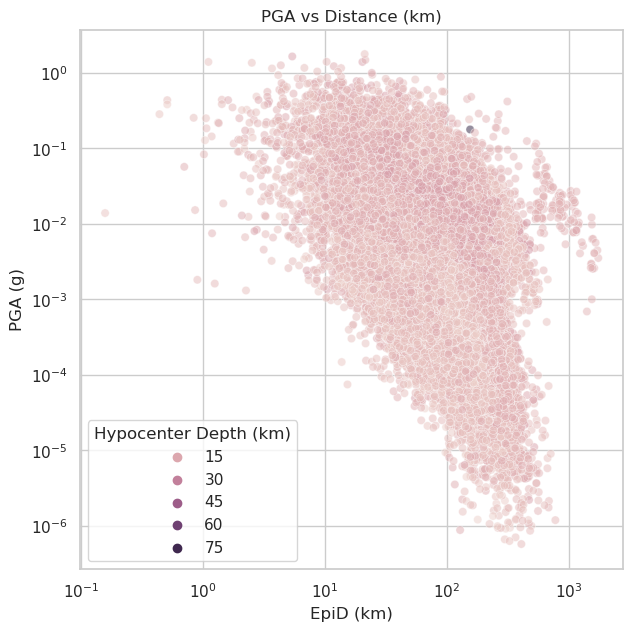

In [9]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(data=ground_motion_PGA_cleaned, x="EpiD (km)", y="PGA (g)",  hue="Hypocenter Depth (km)", alpha=0.5)
ax.set(xscale="log", yscale="log", title='PGA vs Distance (km)')
plt.savefig('Interim_Report/PGA_distance_Depth.png', bbox_inches='tight')

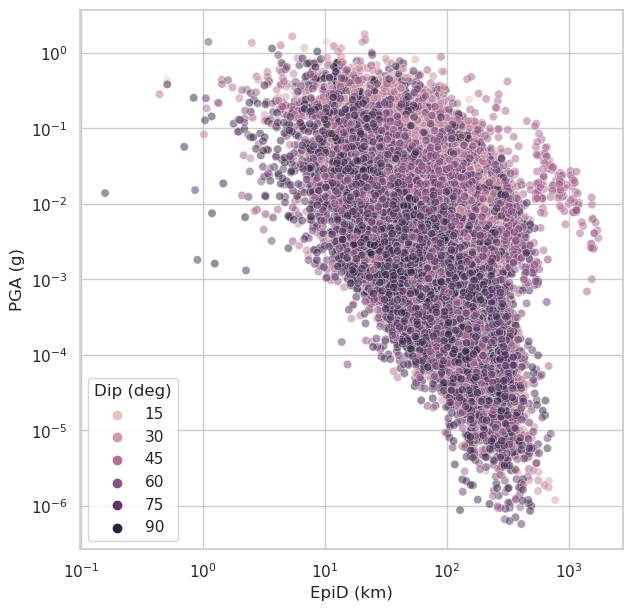

In [10]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(data=ground_motion_PGA_cleaned, x="EpiD (km)", y="PGA (g)",  hue="Dip (deg)", alpha=0.5)
ax.set(xscale="log", yscale="log")
plt.savefig('Interim_Report/PGA_distance_Dip.png', bbox_inches='tight')

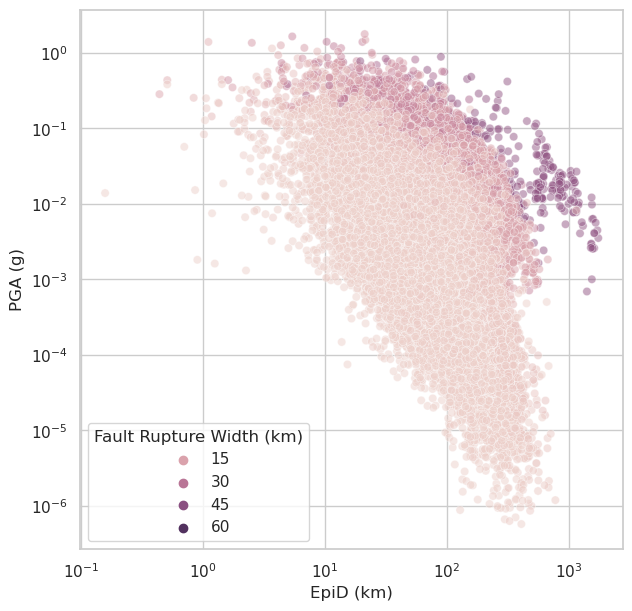

In [11]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(data=ground_motion_PGA_cleaned, x="EpiD (km)", y="PGA (g)",  hue="Fault Rupture Width (km)", alpha=0.5)
ax.set(xscale="log", yscale="log")
plt.savefig('Interim_Report/PGA_distance_Width.png', bbox_inches='tight')

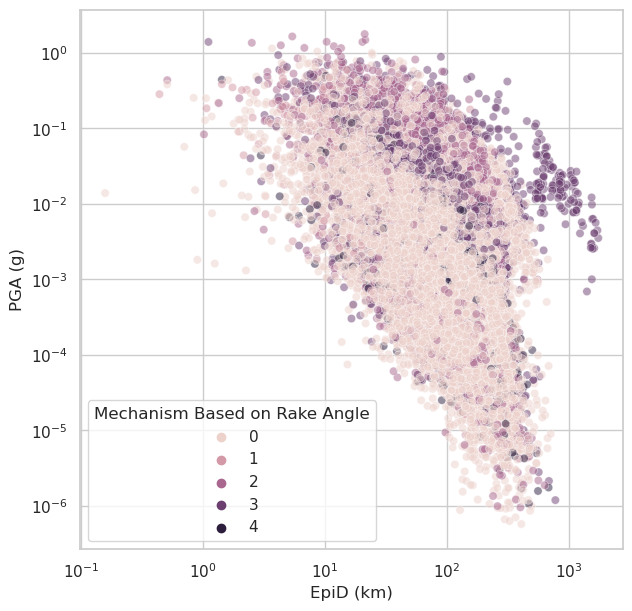

In [12]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(data=ground_motion_PGA_cleaned, x="EpiD (km)", y="PGA (g)",  hue="Mechanism Based on Rake Angle", alpha=0.5)
ax.set(xscale="log", yscale="log")
plt.savefig('Interim_Report/PGA_distance_Mechanism.png', bbox_inches='tight')

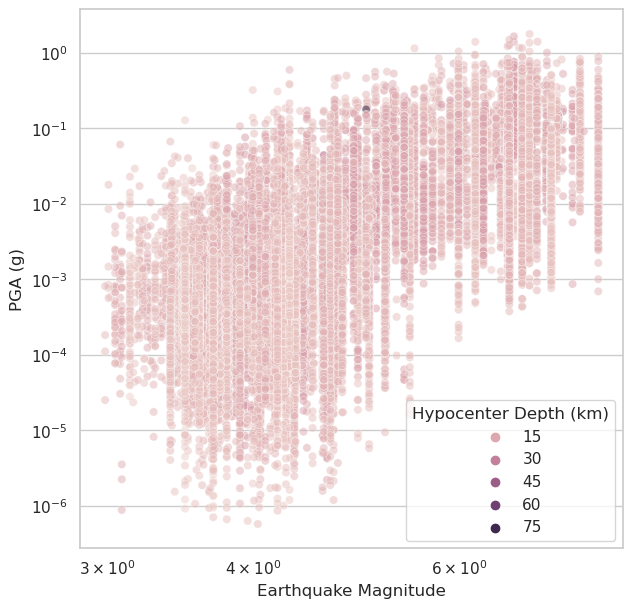

In [13]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(data=ground_motion_PGA_cleaned, x="Earthquake Magnitude", y="PGA (g)",hue="Hypocenter Depth (km)", alpha=0.5)
ax.set(xscale="log", yscale="log")
plt.savefig('Interim_Report/PGA_Mag_Depth.png', bbox_inches='tight')

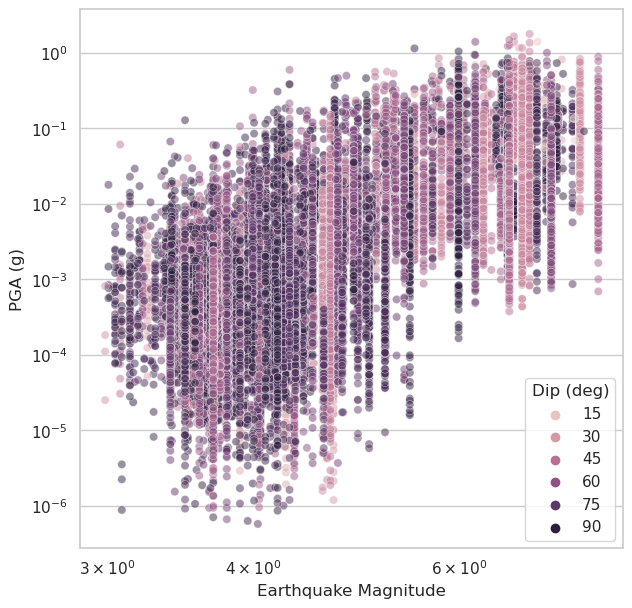

In [14]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(data=ground_motion_PGA_cleaned, x="Earthquake Magnitude", y="PGA (g)",hue="Dip (deg)", alpha=0.5)
ax.set(xscale="log", yscale="log")
plt.savefig('Interim_Report/PGA_Mag_Dip.png', bbox_inches='tight')

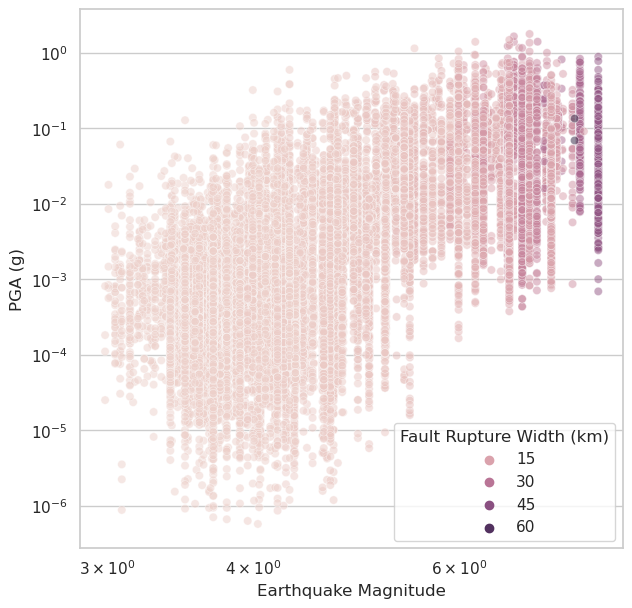

In [15]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(data=ground_motion_PGA_cleaned, x="Earthquake Magnitude", y="PGA (g)",hue="Fault Rupture Width (km)", alpha=0.5)
ax.set(xscale="log", yscale="log")
plt.savefig('Interim_Report/PGA_Mag_Width.png', bbox_inches='tight')

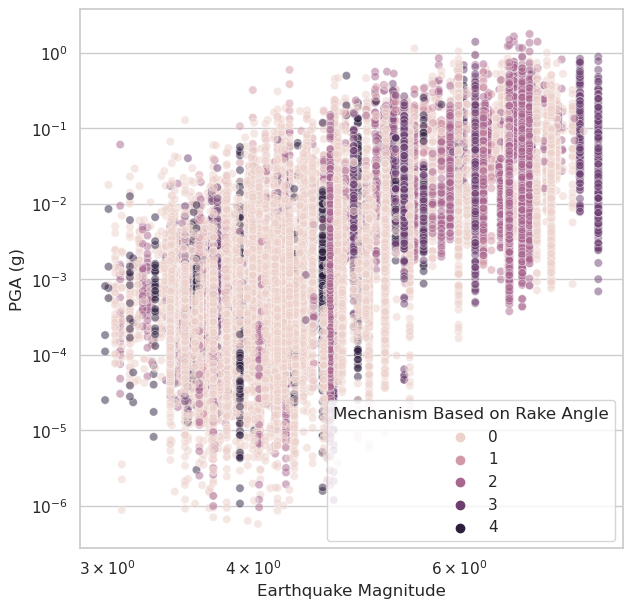

In [16]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(data=ground_motion_PGA_cleaned, x="Earthquake Magnitude", y="PGA (g)",hue="Mechanism Based on Rake Angle", alpha=0.5)
ax.set(xscale="log", yscale="log")
plt.savefig('Interim_Report/PGA_Mag_Mechanism.png', bbox_inches='tight')

In [17]:
with open('data/processed_ground_motion_PGA.pkl', 'wb') as file:
    pk.dump(ground_motion_PGA_cleaned, file)

In [18]:
ground_motion_accl = ground_motion.iloc[ground_motion_PGA_cleaned.index,134:245]

In [19]:
X = ground_motion_accl.corr(method='pearson')

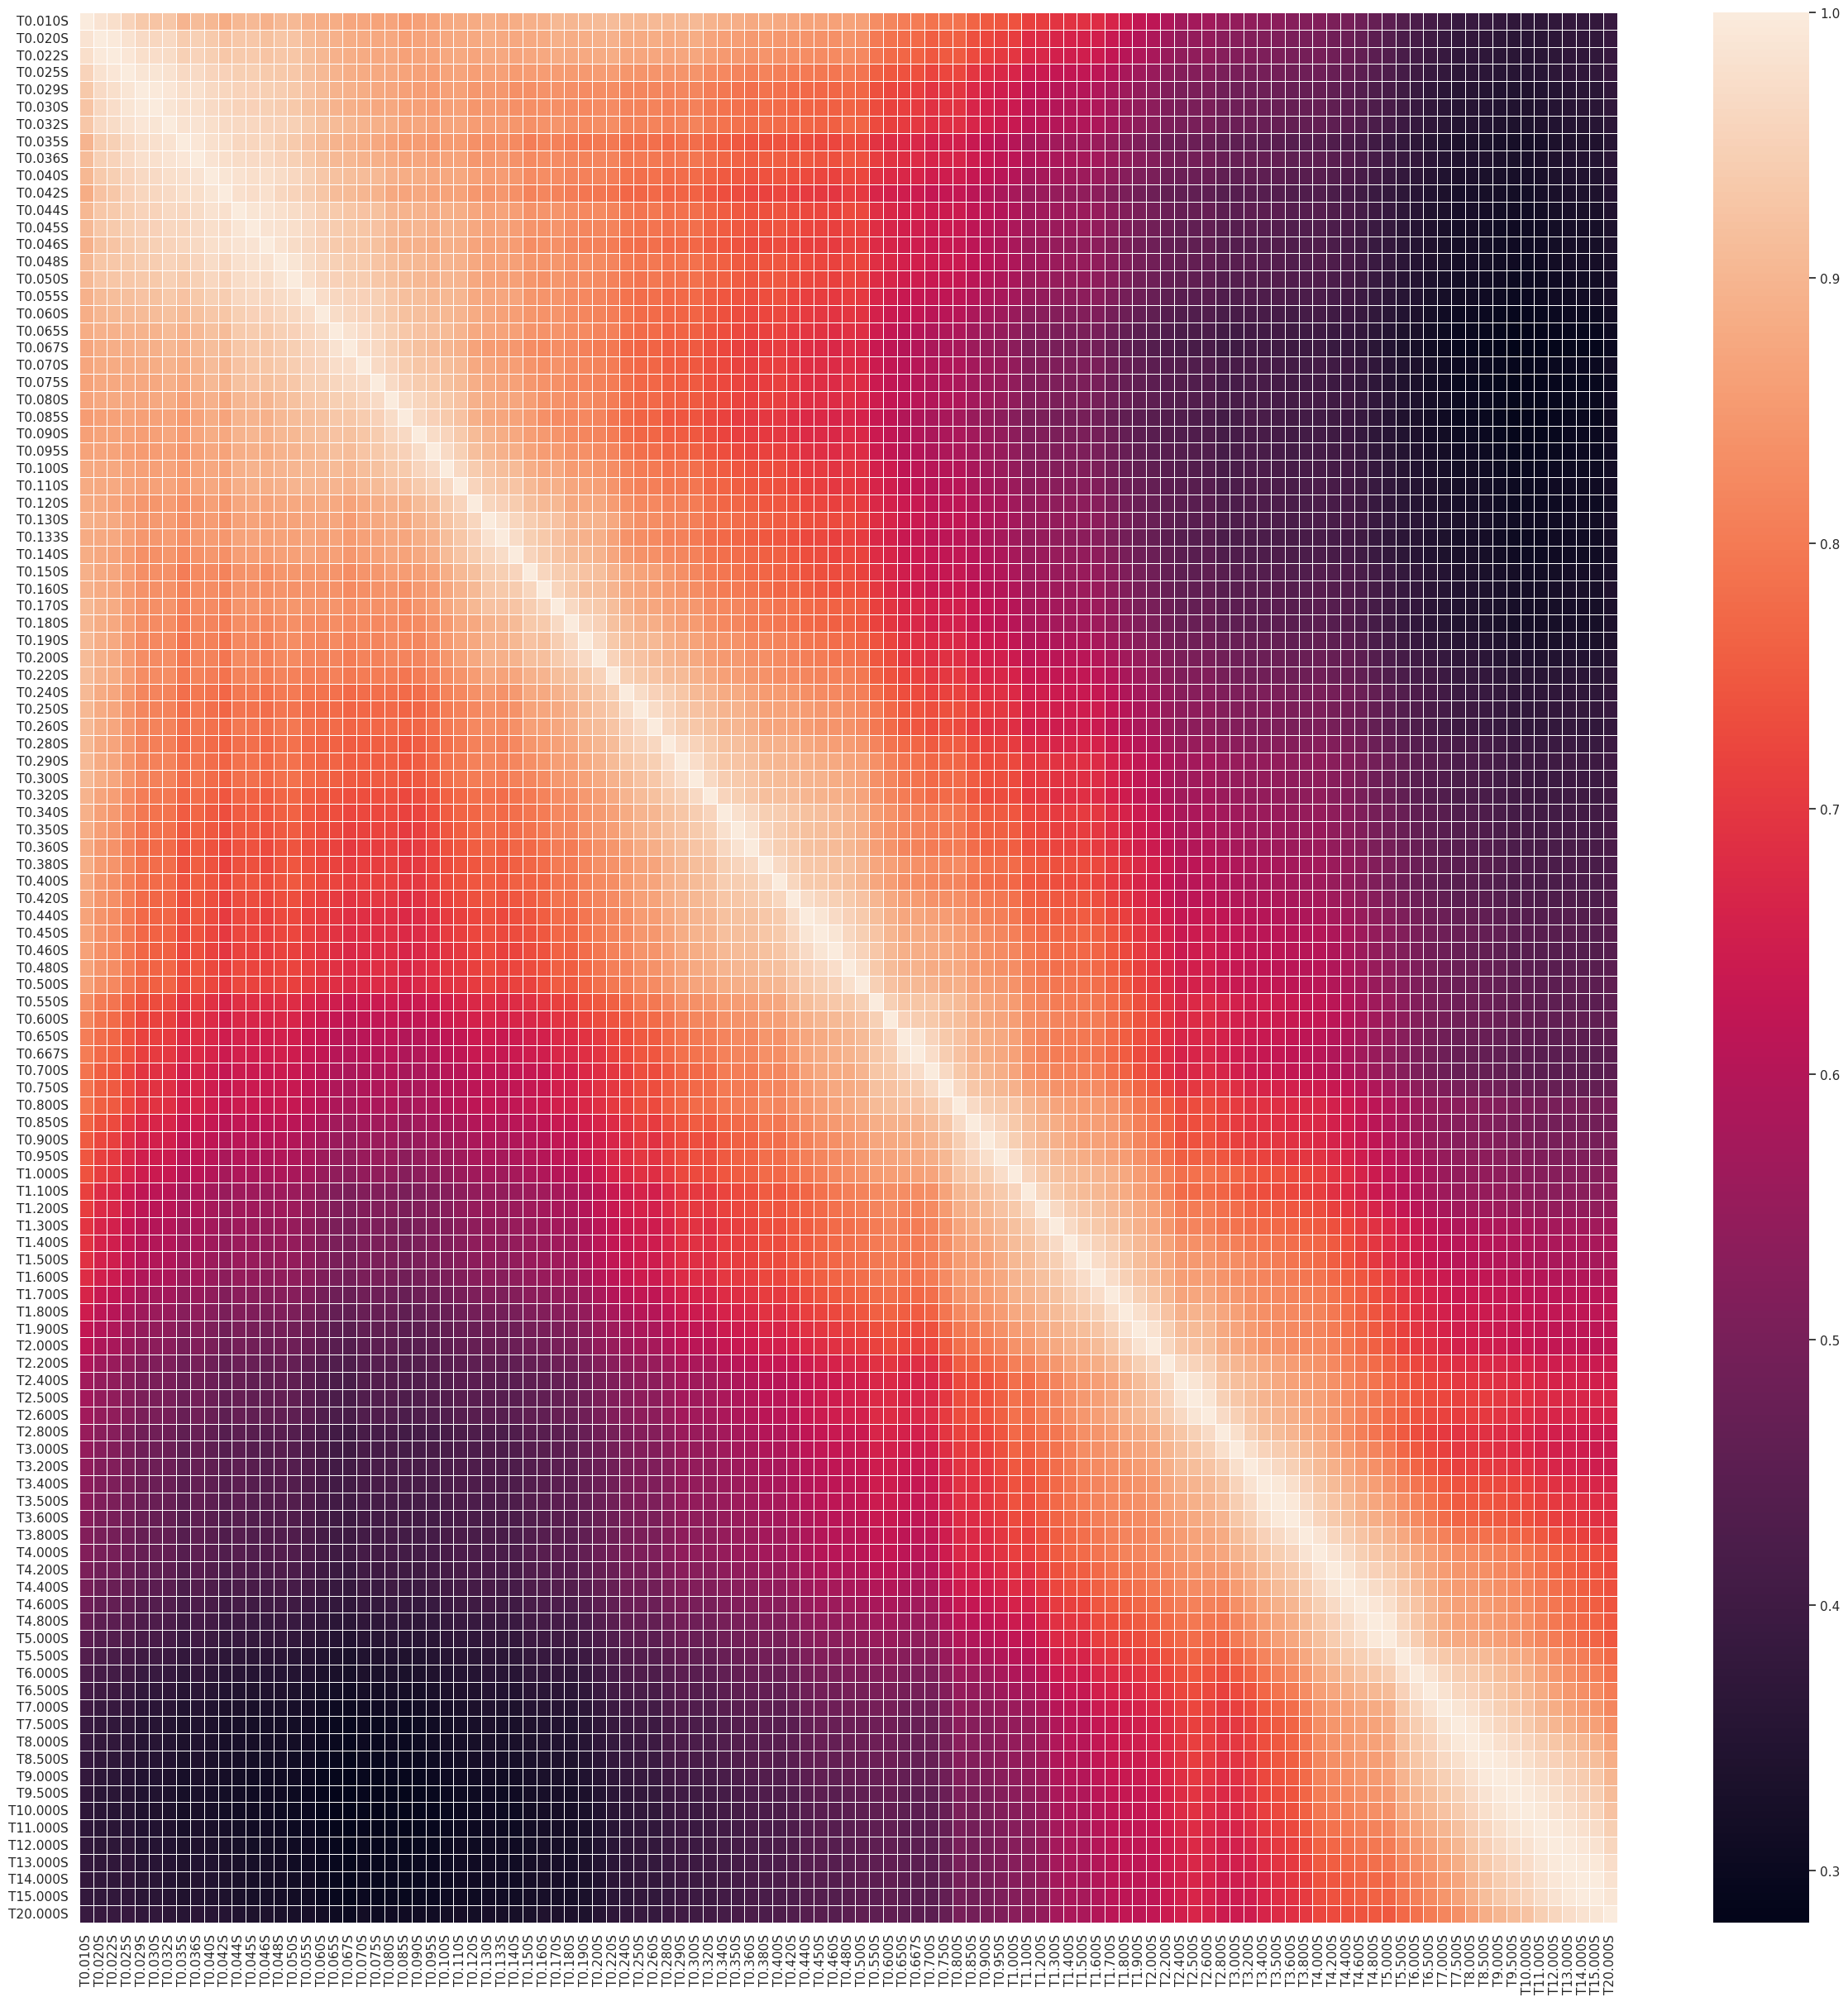

In [20]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(X, annot=False, fmt="d", linewidths=.5, ax=ax)
plt.savefig('corr.png', bbox_inches='tight')